In [1]:
import pandas as pd 
import networkx as nx
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [2]:
def get_files(path,sufix):
    """ Returns list of files on specified path with specified sufix
    """
    mypath = path
    return [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(sufix)]

In [3]:
def is_unidirectional(graph, node1, node2):
    if graph.has_edge(node1, node2) == graph.has_edge(node2, node1):
        return False
    return True

In [4]:
def count_unidirectional_pairs(d_graph):
    edges = d_graph.edges()
    count = 0
    for edge_pair in edges:
        if is_unidirectional(d_graph, edge_pair[0], edge_pair[1]) == True:
            count += 1 
    return count

In [5]:
def fraction_unidirected_pairs(d_graph):
    return round(count_unidirectional_pairs(d_graph)/len(d_graph.edges()),2)

# Fraction of unidirectional links in the network over time (General)

In [6]:
files = get_files("../data/graphs/", "dir")

In [7]:
lst = []
for file in files: 
    d_graph = nx.read_gpickle(join("../data/graphs", file))
    lst.append(fraction_unidirected_pairs(d_graph))

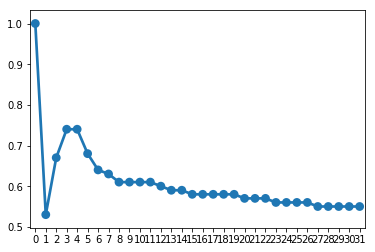

In [8]:
g = sns.pointplot([files.index(i) for i in files], lst)

# Fraction of unidirectional links (Male to Female and Female to Male) in the network over time (General)

In [45]:
d_graph = nx.read_gpickle(join("../data/graphs", files[7]))

In [47]:
def filter_for_gender(d_graph, gender_from, gender_to):
    edges = d_graph.edges()
    print(len(edges))
    for edge_pair in edges:
        if d_graph.node[edge_pair[0]]["gender"] != gender_from or d_graph.node[edge_pair[1]]["gender"] != gender_to:
            edges.remove(edge_pair)
    print(len(edges))
    return edges

In [48]:
# g = nx.DiGraph(filter_for_gender(d_graph, "female", "male"))

In [49]:
def fraction_unidirected_pairs_gender(graph, gender_from, gender_to):
    edges = filter_for_gender(graph, gender_from, gender_to)
    dg = nx.DiGraph(edges)
    return fraction_unidirected_pairs(dg)

In [50]:
# g.nodes()

In [51]:
fraction_unidirected_pairs_gender(d_graph, "male", "female")

9586
4904


0.8

In [52]:
fraction_unidirected_pairs_gender(d_graph, "female", "male")

9586
5008


0.83

In [53]:
def gender_fractions_over_time(files, gender_from, gender_to):
    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join("../data/graphs", file))
        lst.append(fraction_unidirected_pairs_gender(d_graph, gender_from, gender_to))
    return lst

In [54]:
m_f_lst = gender_fractions_over_time(files, "male", "female")

9
4
160
80
341
174
612
312
1286
658
2618
1341
5327
2720
9586
4904
13356
6842
17911
9192
23434
12024
29435
15146
36992
19040
44396
22868
51686
26660
58244
30023
64673
33365
72215
37274
79753
41172
86358
44582
92762
47896
98856
51052
104747
54106
110482
57084
116788
60346
121831
62944
128891
66625
134963
69767
141871
73333
147809
76443
152537
78902
155605
80502


In [55]:
m_f_lst

[1.0,
 0.78,
 0.86,
 0.87,
 0.88,
 0.84,
 0.81,
 0.8,
 0.8,
 0.79,
 0.8,
 0.79,
 0.8,
 0.79,
 0.78,
 0.78,
 0.79,
 0.78,
 0.78,
 0.78,
 0.78,
 0.77,
 0.78,
 0.77,
 0.78,
 0.78,
 0.77,
 0.77,
 0.77,
 0.77,
 0.77,
 0.77]